The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [21]:
# # Loading in required libraries
# import pandas as pd
# import seaborn as sns
# import numpy as np

# # Read in the Nobel Prize data
# nobel = pd.read_csv('data/nobel.csv')

# # What is the most commonly awarded gender and birth country?
# top_gender = nobel['sex'].value_counts().index[0]
# top_country = nobel['birth_country'].value_counts().index[0]
# print("\n The gender with the most Nobel laureates is :", top_gender)
# print(" The most common birth country of Nobel laureates is :", top_country)

# # Calculate the proportion of USA born winners per decade
# nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
# nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
# prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# # Identify the decade with the highest proportion of US-born winners
# max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]

# # Optional: Plotting USA born winners
# ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

# # Calculating the proportion of female laureates per decade
# nobel['female_winner'] = nobel['sex'] == 'Female'
# prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# # Find the decade and category with the highest proportion of female laureates
# max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# # Create a dictionary with the decade and category pair
# max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# # Optional: Plotting female winners with % winners on the y-axis
# ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

# # Finding the first woman to win a Nobel Prize
# nobel_women = nobel[nobel['female_winner']]
# min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]
# first_woman_name = min_row['full_name'].values[0]
# first_woman_category = min_row['category'].values[0]
# print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")

# # Selecting the laureates that have received 2 or more prizes
# counts = nobel['full_name'].value_counts()
# repeats = counts[counts >= 2].index
# repeat_list = list(repeats)

# print("\n The repeat winners are :", repeat_list)


In [22]:

# Loading in required libraries
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import seaborn as sns
import numpy as np
# Reading in the Nobel Prize data
nobel = pd.read_csv('data/nobel.csv')

# Taking a look at the first several winners
# ... YOUR CODE FOR TASK 1 ...
nobel.head(6)

year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France
5  1901     Physics  ...     Munich       Germany

[6 rows x 18 columns]

In [23]:
# Display the number of (possibly shared) Nobel Prizes handed
# out between 1901 and 2016
# ... YOUR CODE FOR TASK 2 ...
display(len(nobel['year']))

# Display the number of prizes won by male and female recipients.
# ... YOUR CODE FOR TASK 2 ...
display(nobel['sex'].value_counts())

# Display the number of prizes won by the top 10 nationalities.
# ... YOUR CODE FOR TASK 2 ...
(nobel['birth_country'].value_counts()).head(10)

1000

Male      905
Female     65
Name: sex, dtype: int64

United States of America    291
United Kingdom               91
Germany                      67
France                       58
Sweden                       30
Japan                        28
Canada                       21
Switzerland                  19
Netherlands                  19
Italy                        18
Name: birth_country, dtype: int64

In [24]:

# Calculating the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country']=='United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Display the proportions of USA born winners per decade
# ... YOUR CODE FOR TASK 3 ...
prop_usa_winners

decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000

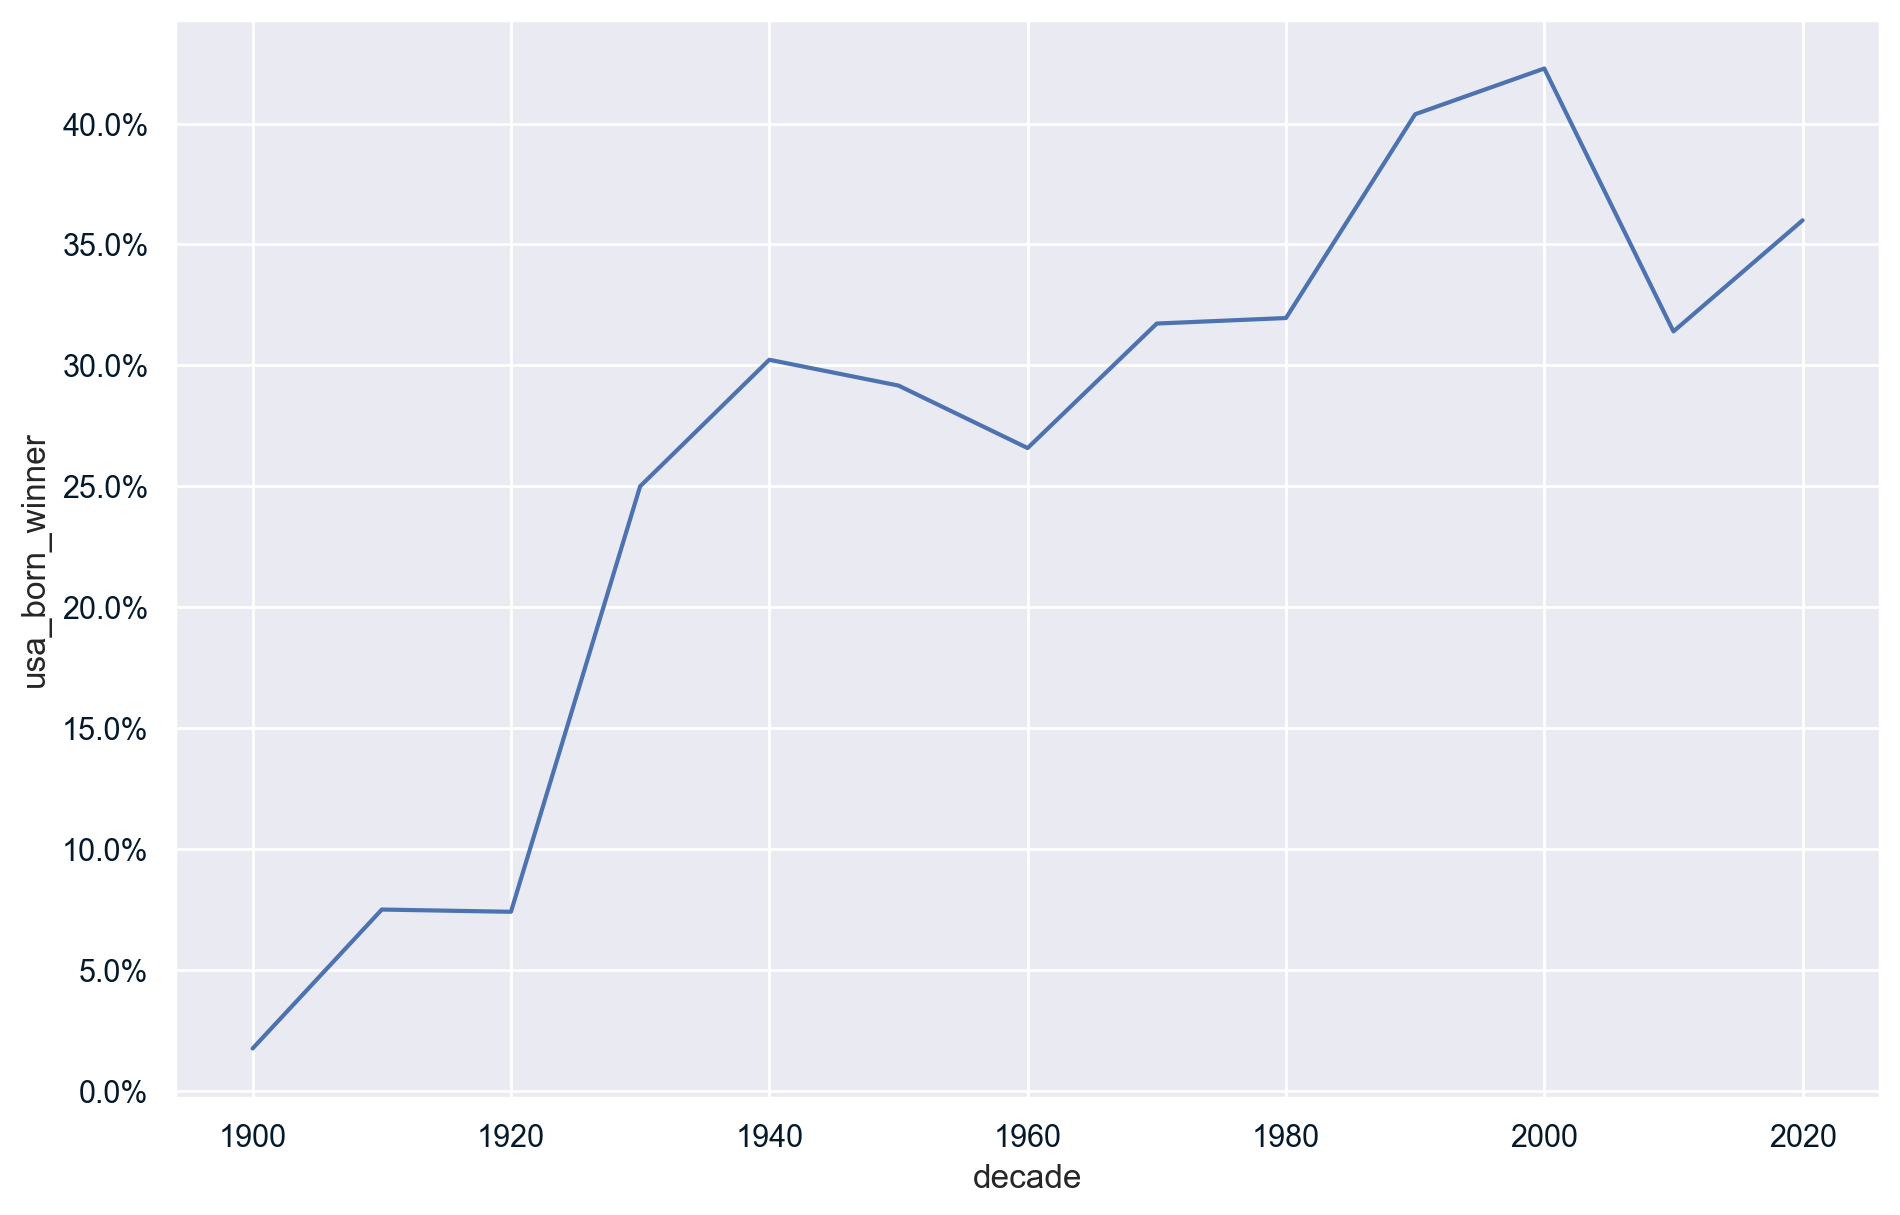

In [25]:

# Setting the plotting theme
sns.set()
# and setting the size of all plots.
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [11, 7]

# Plotting USA born winners 
ax = sns.lineplot(x='decade', y='usa_born_winner', data=prop_usa_winners)

# Adding %-formatting to the y-axis
from matplotlib.ticker import PercentFormatter
# ... YOUR CODE FOR TASK 4 ...
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

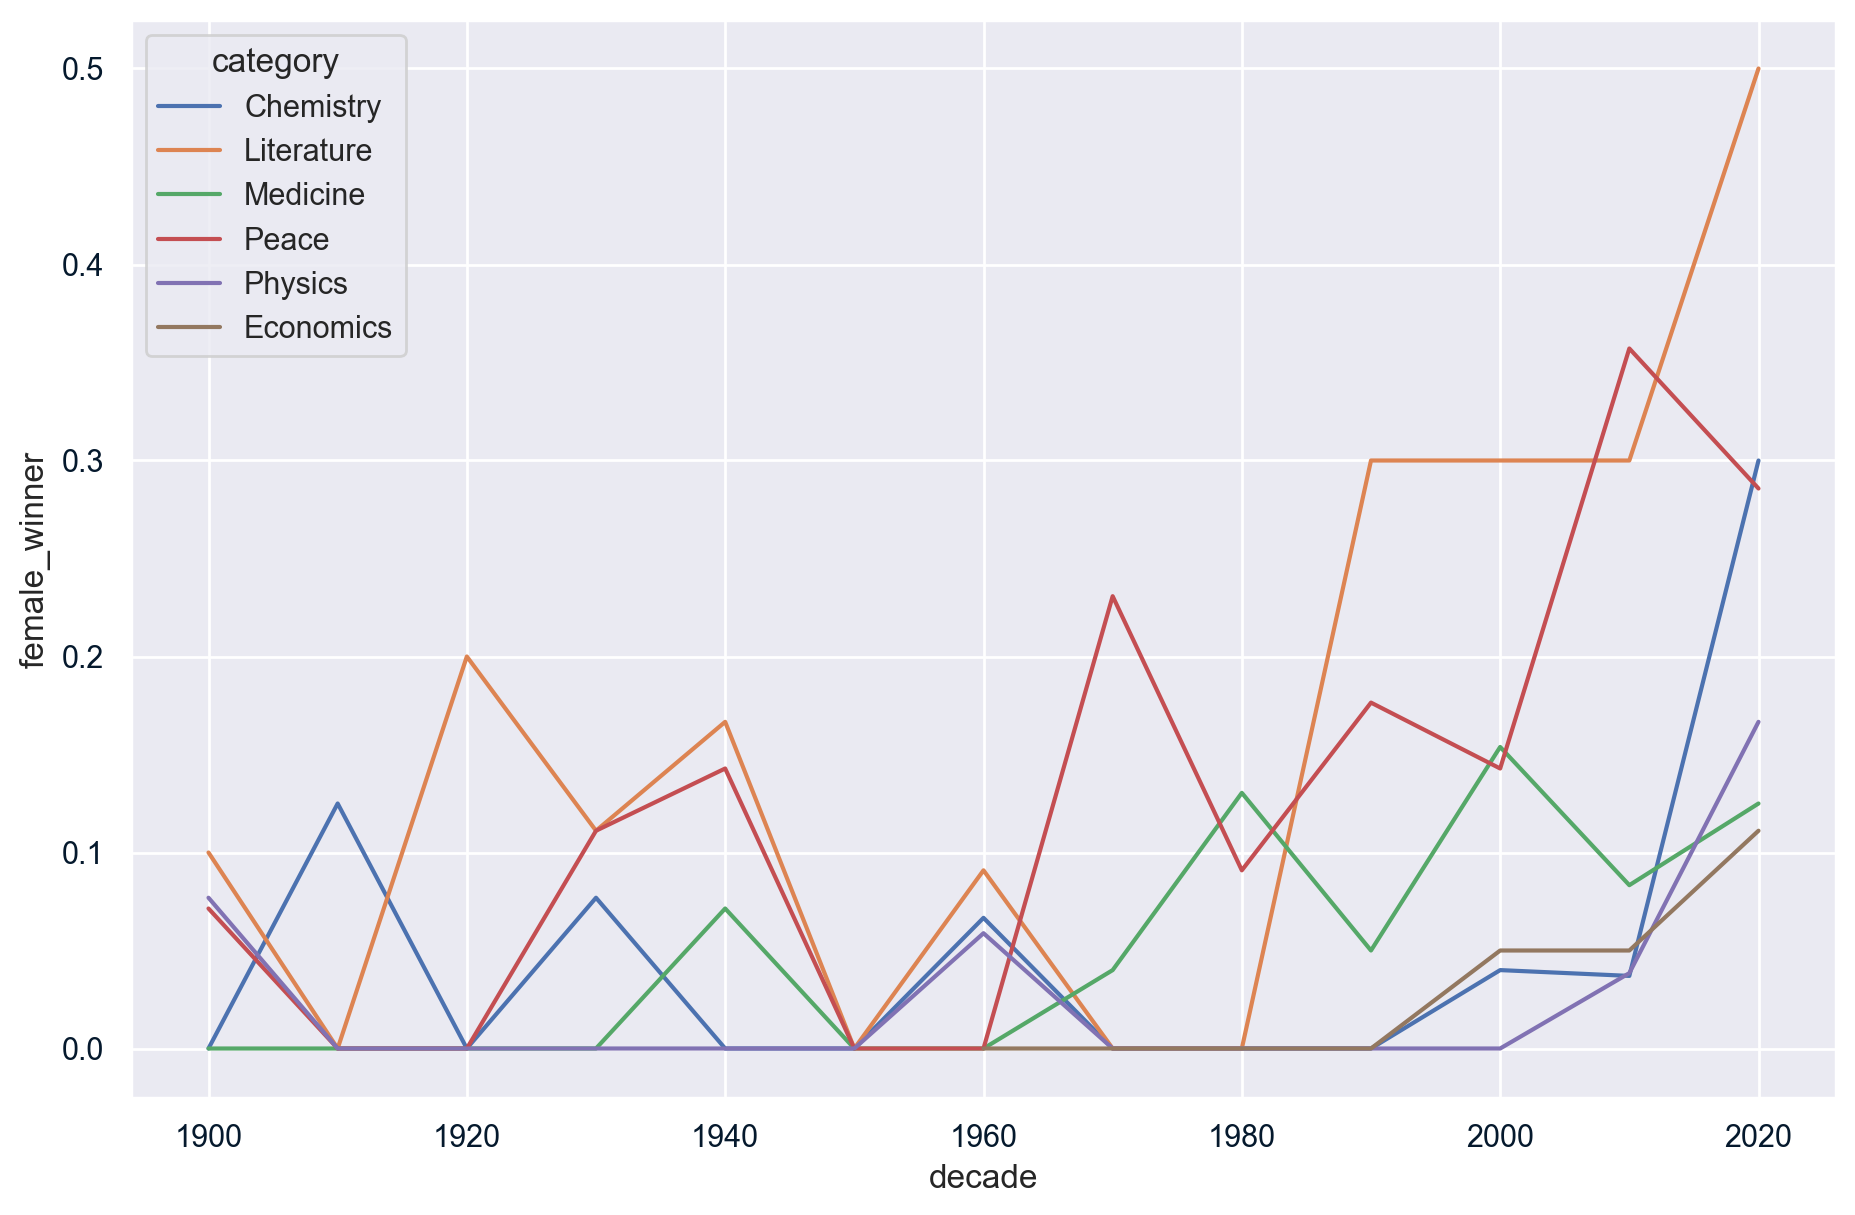

In [26]:
# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == "Female"
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Plotting USA born winners with % winners on the y-axis
# ... YOUR CODE FOR TASK 5 ...
ax = sns.lineplot(x='decade', y='female_winner', hue='category', data=prop_female_winners)

In [27]:
# Picking out the first woman to win a Nobel Prize
# ... YOUR CODE FOR TASK 5 ...
nobel[nobel['sex'] == 'Female'].nsmallest(1, 'year')

year category  ... decade female_winner
19  1903  Physics  ...   1900          True

[1 rows x 21 columns]

In [28]:

# Selecting the laureates that have received 2 or more prizes.
# ... YOUR CODE FOR TASK 5 ...
nobel.groupby('full_name').filter(lambda x: len(x) >= 2)

year   category  ... decade female_winner
19   1903    Physics  ...   1900          True
62   1911  Chemistry  ...   1910          True
89   1917      Peace  ...   1910         False
215  1944      Peace  ...   1940         False
278  1954  Chemistry  ...   1950         False
283  1954      Peace  ...   1950         False
298  1956    Physics  ...   1950         False
306  1958  Chemistry  ...   1950         False
340  1962      Peace  ...   1960         False
348  1963      Peace  ...   1960         False
424  1972    Physics  ...   1970         False
505  1980  Chemistry  ...   1980         False
523  1981      Peace  ...   1980         False

[13 rows x 21 columns]

In [29]:
# Converting birth_date from String to datetime
nobel['birth_date'].dtype

dtype('O')

In [30]:
nobel['birth_date'].replace('1993-00-00', '1993-01-01', inplace=True)

In [31]:
nobel['birth_date'] = pd.to_datetime(nobel['birth_date'], errors = 'coerce')

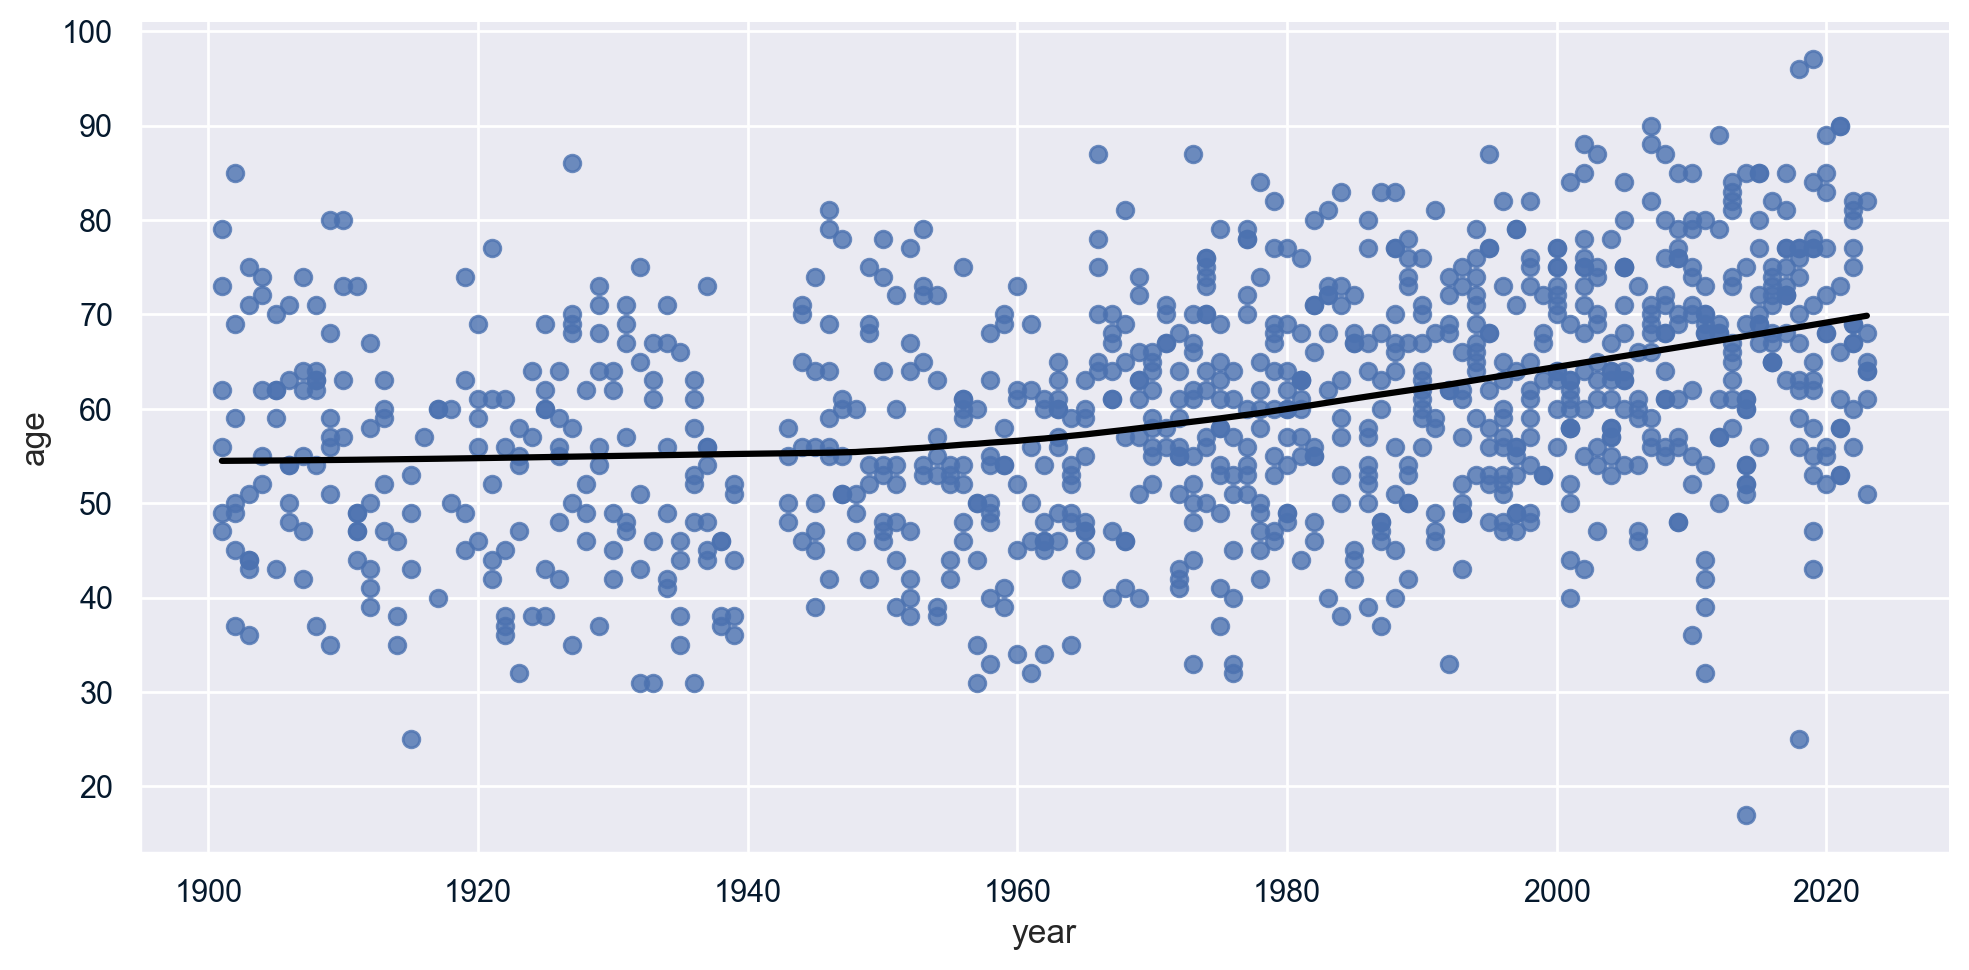

In [32]:


# Calculating the age of Nobel Prize winners
nobel['age'] = nobel['year'] - nobel['birth_date'].dt.year

# Plotting the age of Nobel Prize winners
sns.lmplot(x='year', y='age', data=nobel, lowess=True, aspect=2, line_kws={'color': 'black'})

In [33]:

# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))


# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

year   category  ... female_winner   age
942  2019  Chemistry  ...         False  97.0

[1 rows x 22 columns]

year category                       prize  ... decade female_winner   age
885  2014    Peace  The Nobel Peace Prize 2014  ...   2010          True  17.0

[1 rows x 22 columns]

In [34]:
nobel['age']

0      49.0
1      62.0
2      47.0
3      73.0
4      79.0
       ... 
995     NaN
996     NaN
997    64.0
998    51.0
999     NaN
Name: age, Length: 1000, dtype: float64

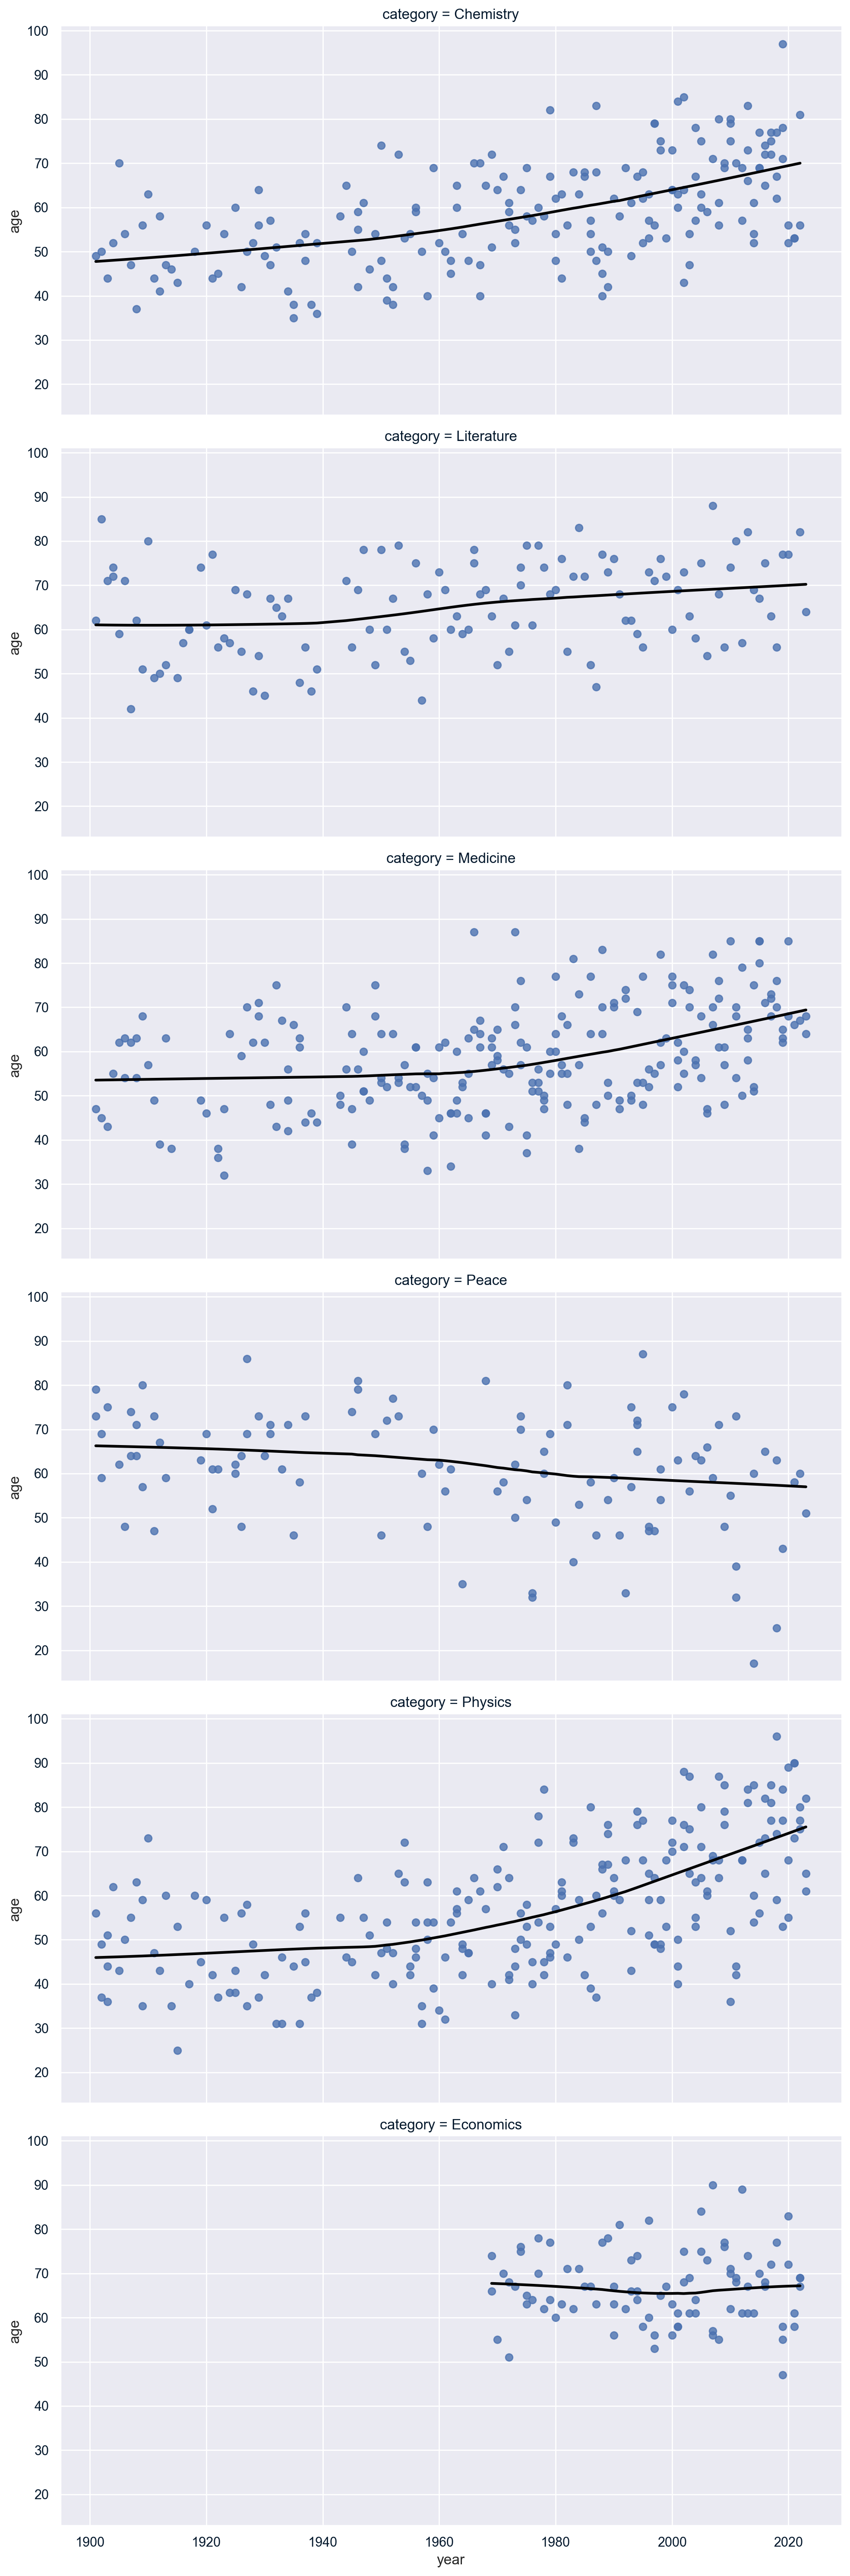

In [35]:
sns.lmplot(x="year", y="age", data=nobel, row="category", lowess=True, aspect=2, line_kws={"color" : "black"})


In [36]:
# The oldest winner of a Nobel Prize as of 2016
display(nobel.nlargest(1, 'age'))

# The youngest winner of a Nobel Prize as of 2016
nobel.nsmallest(1, 'age')

year   category  ... female_winner   age
942  2019  Chemistry  ...         False  97.0

[1 rows x 22 columns]

year category                       prize  ... decade female_winner   age
885  2014    Peace  The Nobel Peace Prize 2014  ...   2010          True  17.0

[1 rows x 22 columns]

In [37]:
youngest_winner = 'Malala Yousafzai'